In [1]:
from optionsbacktrader import OptionsBroker, OptionsTradingEnvironment
from stable_baselines3 import PPO, SAC, DDPG

import matplotlib.pyplot as plt

In [2]:
broker = OptionsBroker()
broker.load_historical_data('./Sample_SPX_20151001_to_20151030.sqlite3', fidelity='day')

env = OptionsTradingEnvironment(broker)

/Users/Chris/.local/share/virtualenvs/codebase-7p0qpv_E/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Using cpu device
Wrapping the env in a DummyVecEnv.
Logging to ./ppo_tensorboard/PPO_3
---------------------------
| time/              |    |
|    fps             | 3  |
|    iterations      | 1  |
|    time_elapsed    | 6  |
|    total_timesteps | 22 |
---------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1            |
|    iterations           | 2            |
|    time_elapsed         | 32           |
|    total_timesteps      | 44           |
| train/                  |              |
|    approx_kl            | -0.026287187 |
|    clip_fraction        | 0.227        |
|    clip_range           | 0.2          |
|    entropy_loss         | -8.51        |
|    explained_variance   | -4.38e+04    |
|    learning_rate        | 0.0003       |
|    loss                 | 2.23e+04     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0374      |
|    std                  | 1

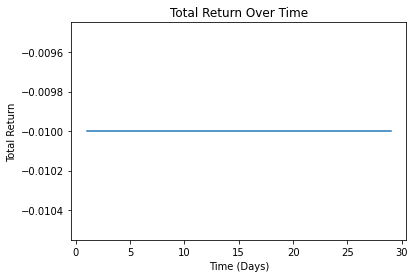

In [6]:
policy_kwargs = dict(net_arch=[1024, 768, 512, 256])
model = PPO('MlpPolicy',
            env,
            verbose=1,
            n_steps=len(broker.get_trading_days()),
            policy_kwargs=policy_kwargs,
            tensorboard_log='./ppo_tensorboard')
model.learn(total_timesteps=20000)

rewards = []
obs = env.reset()

for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)

    day_delta = broker.current_date - broker.data_start_date

    rewards.append((day_delta.days, reward))

    env.render()

    if done:
        break

plt.title('Total Return Over Time')
plt.xlabel('Time (Days)')
plt.ylabel('Total Return')
plt.plot(*zip(*rewards))
plt.show()

Using cpu device
Wrapping the env in a DummyVecEnv.
Logging to ./ddpg_tensorboard/DDPG_12
---------------------------
| time/              |    |
|    episodes        | 4  |
|    fps             | 2  |
|    time_elapsed    | 34 |
|    total timesteps | 84 |
---------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 0        |
|    time_elapsed    | 560      |
|    total timesteps | 168      |
| train/             |          |
|    learning_rate   | 0.001    |
|    n_updates       | 63       |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 12       |
|    fps             | 0        |
|    time_elapsed    | 1046     |
|    total timesteps | 252      |
| train/             |          |
|    learning_rate   | 0.001    |
|    n_updates       | 147      |
---------------------------------
---------------------------------


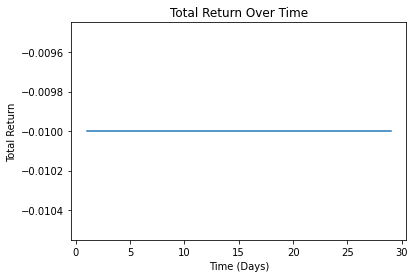

In [3]:
env.reset()

policy_kwargs = dict(net_arch=[1024, 768, 512, 256])
model = DDPG('MlpPolicy',
            env,
            verbose=1,
            policy_kwargs=policy_kwargs,
            tensorboard_log='./ddpg_tensorboard')
model.learn(total_timesteps=1000)

rewards = []
obs = env.reset()

for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)

    day_delta = broker.current_date - broker.data_start_date

    rewards.append((day_delta.days, reward))

    env.render()

    if done:
        break

plt.title('Total Return Over Time')
plt.xlabel('Time (Days)')
plt.ylabel('Total Return')
plt.plot(*zip(*rewards))
plt.show()

Using cpu device
Wrapping the env in a DummyVecEnv.
Logging to ./sac_tensorboard/SAC_2
---------------------------
| time/              |    |
|    episodes        | 4  |
|    fps             | 4  |
|    time_elapsed    | 20 |
|    total timesteps | 84 |
---------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 0        |
|    time_elapsed    | 2306     |
|    total timesteps | 168      |
| train/             |          |
|    actor_loss      | 65.7     |
|    critic_loss     | 835      |
|    ent_coef        | 1.02     |
|    ent_coef_loss   | -0.245   |
|    learning_rate   | 0.0003   |
|    n_updates       | 67       |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 12       |
|    fps             | 0        |
|    time_elapsed    | 4958     |
|    total timesteps | 252      |
| train/             |          |
|  

----------------------------------------------------------------------------------------------------

Date: 10/15/2015
Total Return: 81.002%

Positions:

SPXW151023C02120000 Strike: 2120 Qty: 1 Price: -0.15000000000000002 Market Value: 25.000000000000004

SPXW151023C01985000 Strike: 1985 Qty: 1 Price: 23.799999999999997 Market Value: 4310.0

----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------

Date: 10/16/2015
Total Return: 110.438%

Positions:

SPXW151023C02120000 Strike: 2120 Qty: 1 Price: -0.15000000000000002 Market Value: 25.000000000000004

SPXW151023C01985000 Strike: 1985 Qty: 1 Price: 23.799999999999997 Market Value: 5015.0

----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------

Date:

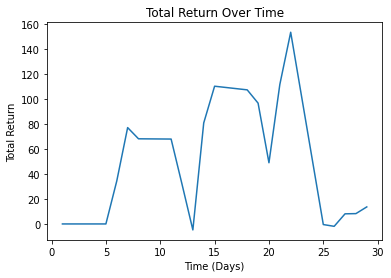

In [3]:
env.reset()

policy_kwargs = dict(net_arch=[1024, 768, 512, 256])
model = SAC('MlpPolicy',
            env,
            verbose=1,
            policy_kwargs=policy_kwargs,
            tensorboard_log='./sac_tensorboard')
model.learn(total_timesteps=1000)

rewards = []
obs = env.reset()

for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)

    day_delta = broker.current_date - broker.data_start_date

    rewards.append((day_delta.days, reward))

    env.render()

    if done:
        break

plt.title('Total Return Over Time')
plt.xlabel('Time (Days)')
plt.ylabel('Total Return')
plt.plot(*zip(*rewards))
plt.show()

In [ ]:
policy_kwargs = dict(net_arch=[1024, 768, 512, 256])
model = PPO('MlpPolicy', env, verbose=1, n_steps=len(broker.get_trading_days()), policy_kwargs=policy_kwargs)
model.learn(total_timesteps=100)

obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
        break

print('DONE')

env.close()

In [ ]:
policy_kwargs = dict(net_arch=[1024, 768, 512, 256])
model = PPO('MlpPolicy', env, verbose=1, n_steps=len(broker.get_trading_days()), policy_kwargs=policy_kwargs)
model.learn(total_timesteps=100)

obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
        break

print('DONE')

env.close()

In [ ]:
policy_kwargs = dict(net_arch=[1024, 768, 512, 256])
model = PPO('MlpPolicy', env, verbose=1, n_steps=len(broker.get_trading_days()), policy_kwargs=policy_kwargs)
model.learn(total_timesteps=100)

obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
        break

print('DONE')

env.close()

In [ ]:
policy_kwargs = dict(net_arch=[1024, 768, 512, 256])
model = PPO('MlpPolicy', env, verbose=1, n_steps=len(broker.get_trading_days()), policy_kwargs=policy_kwargs)
model.learn(total_timesteps=100)

obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
        break

print('DONE')

env.close()

In [ ]:
policy_kwargs = dict(net_arch=[1024, 768, 512, 256])
model = PPO('MlpPolicy', env, verbose=1, n_steps=len(broker.get_trading_days()), policy_kwargs=policy_kwargs)
model.learn(total_timesteps=100)

obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
        break

print('DONE')

env.close()

In [ ]:
policy_kwargs = dict(net_arch=[1024, 768, 512, 256])
model = PPO('MlpPolicy', env, verbose=1, n_steps=len(broker.get_trading_days()), policy_kwargs=policy_kwargs)
model.learn(total_timesteps=100)

obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
        break

print('DONE')

env.close()

In [ ]:
policy_kwargs = dict(net_arch=[1024, 768, 512, 256])
model = PPO('MlpPolicy', env, verbose=1, n_steps=len(broker.get_trading_days()), policy_kwargs=policy_kwargs)
model.learn(total_timesteps=100)

obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
        break

print('DONE')

env.close()